# House Pricing

### Introduction
This is our project for 'Applied Data Science with Python' course.

In this project we will predect the house prices in Ames, a city located in the central part of Iowa, United States. It was ranked ninth on CNNMoney.com "Best Places to Live" list. [1]

We intend to build an explenatory regression models that describe how to price a house in Ames. Then we predict the final price of each home when 79 explanatory variables describing almost every aspect of
residential homes are provided in the data set.

This data set is originally taken from Kaggle. [2]

### Overview
There is a few basic steps in every data analysis process. 
This is an overview of the steps we took to get to the final predection:

* Data Collecting - Loading the required data set
* Data Description - An overall look at each variable, analysis about their meaning and importance for this problem
* Data Cleaning - Dealing with the missing data and outliers 
* Data Pre-processing - In which we will look separately to numerical/categorical variables and their connection to the problem
* Data processing - We'll check if our data meets the assumptions required by most multivariate techniques

### Import Libraries
Import the needed libraries for our analysis.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
# Regression package
import statsmodels.formula.api as sm
from sklearn.ensemble import RandomForestRegressor

### Data Collecting

In [15]:
train = pd.read_csv("train.csv")

### Data Description

Let's make an initial overall look at our data set!

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.columns 

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


First imprition of the data
- 81 features
- 1460 observations

Two main groups of features
- Numerical features
- Categorical features

Missing values from a few features, that we will address in the next step of analysis.

It is important to address every one of the features in accordance of it's type. We will create dummy variables and convert some categorical features to numerical so we can run mathematical calculation over them. We will handle the missing data and outliers so we can build a good model without any biases and errors.

So LET's GO!

### Data Cleaning
Starting with the first step, handling the missing data and the outliers!

#### Missing Data

In [26]:
#count of missing data for every feature!
missing = train.isnull().sum().sort_values(ascending=False)
missing.head(25)

MiscFeature     1397
Alley           1361
Fence           1170
LotFrontage      257
GarageType        81
GarageCond        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
LandContour        0
YearRemodAdd       0
BsmtFinSF1         0
MSSubClass         0
Foundation         0
ExterCond          0
ExterQual          0
MasVnrArea         0
MasVnrType         0
Exterior2nd        0
Exterior1st        0
dtype: int64

Here are all the features with the number of missing observations. The usual approuch to deal with missing data is by filling the null with the average, but if we think about our data we figure out that there is no meaning to this solution! Why? We have here specific features to each individual house, and it's not logical to fill in the missing with an average, the house either have it or not! (e.g. there is a pool in the house or there isn't - we can't average that!)

The next step is deleting variables the missing data, which in return may lead to bias or wrong analysis of the data. So, we will try to save a few features first.

Notice that the three features 'Electrical', 'MasVnrType' and 'MasVnrArea' have less than 5% of missing data, so we will delete these observations and keep the variables.

In [16]:
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train = train.drop(train.loc[train['MasVnrArea'].isnull()].index)
train = train.drop(train.loc[train['MasVnrType'].isnull()].index)

Let's deal with 'PoolQC' and it's 1453 missing data!

We notice that 'PoolQC' have the same number of valid observation as 'PoolArea', so we predict that they are the same observations and we'll check if the null observation in 'PoolQC' are the same observation in 'PoolArea' with zero as an input!
If what we think is actually right, we'll fill in the missing data with NA since it's not a numerical feature, instead of deleting all of the variable.

In [17]:
#check 'PoolQC' null data are the same as the 0 in 'PoolArea'
train[train['PoolQC'].notnull()].index==train[train['PoolArea']>0].index

array([ True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [18]:
#fill in the null with NA
train['PoolQC'] = train['PoolQC'].fillna('NA')

Same goes for 'FireplaceQu', we'll check if the null observations are the same ones with 0 in 'Fireplaces', and if it's TRUE then we'll fill in the missing with NA.

In [19]:
#check 'FireplaceQu' null data are the same as the 0 in 'Fireplaces'
all(train[train['FireplaceQu'].isnull()].index==train[train['Fireplaces']==0].index)

True

In [20]:
#fill in the null with NA
train['FireplaceQu'] = train['FireplaceQu'].fillna('NA')

Let's see the correlation between 'PoolQC' and 'PoolArea'. To do so we need to convert 'PoolQC' to a numerical variable first!

We'll use mapping by dictionary and then plot the result vs. 'PoolArea'

In [22]:
#convert to numerical
mapping = {'NA':0, 'Ex':4, 'Gd':3, 'TA':2, 'Fa':1,}
train = train.replace({'PoolQC': mapping})

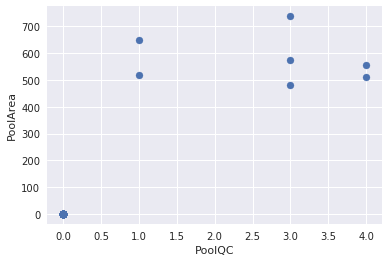

In [23]:
plt.scatter(train['PoolQC'], train['PoolArea']) 
plt.xlabel('PoolQC')
plt.ylabel('PoolArea')

We can see that the correlation is a bit high but not high enough in a significant specific way. 

Now for some of the remaining features we notice that they are related to the same variable, such as 'GarageCond' and 'GarageType' that in the big picture are related to a bigger variable, garage, and the info represented in one of these variables is sufficient for us. In addition to that we notice that all the related features with missing data have exactly the same number of missing values. In this case we can delete these features without fearing for damaging our data.

The same goes for 'BsmtExposure', 'BsmtCond' and few others that are related to a bigger feature, basement.

In cases like ours, having two or more predictor variables with the same information (highly correlated), means that we have what's called Multicollinearity [3][4]. Deleting these excess variables will solve this situation.

The question that rises from the simmilarty of observations is if they are realy the same?
In order to verify there is no multicollinearity we correlate the features, if they are highly correlated then it means that we have multicollinearity and we'll remove one of those same features!
  
*For example the last graph that shows the correlation between 'PoolQC' and 'PoolArea' we can see that there is positive high correlation but not high enough to consider it as a multicollinearity problem.

So now we will delete the multi dimensional variables that we have with missing data.

In [12]:
#deleting the duplicated features with missing data and reducing same variable dimensions
missing = train.isnull().sum().sort_values(ascending=False)
train = train.drop(missing[missing>8].index,1)

#checking again for null after all the filteration 
train.isnull().sum().max()

0

We are done with missing data :D next !!

##### The next step should be editing the outliers, but we will deal with them after we analyze 'SalePrice'.

### Data Pre-Analysis
#### SalePrice Analysis
'SalePrice' is THE variable. In this analysis we'll want to find the correlation and predictions of this variable in regards of the others.
We'll start with a little describtion, and then we'll continue to correlations analysis.

In [17]:
train['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Everything looks normal, even a bit cheaper than what we thought >.<' lucky americans!

Let's look at the linear and logarithmical distribution of 'SalePrice' 

In [53]:
#a function that return the a distribution plot of x - (mean, median and std)
def dists(x, flag):
    sns.distplot(x)
    if flag:
        plt.axvline(np.mean(x), color='b', linestyle='dashed', linewidth=2, label="avg - "'{:.2f}'.format(np.mean(x)))
        plt.axvline(np.median(x), color='g', linestyle='dashed', linewidth=2, label="median - "'{:.2f}'.format(np.median(x)))
        plt.axvline(np.std(x), color='r', linestyle='dashed', linewidth=2, label="std - "'{:.2f}'.format(np.std(x)))
        plt.legend(loc='upper right')

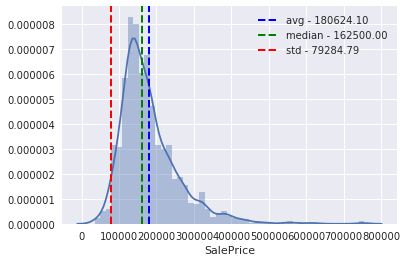

In [54]:
dists(train['SalePrice'], True)

  We notic that the graph deviate from the normal distribution and has a positive skewness which means that many houses are sold for less than the average price.   

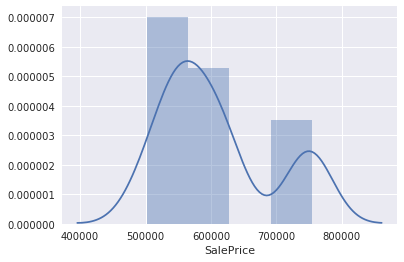

In [55]:
dists(train['SalePrice'][train['SalePrice']>500000], False)

Zoom in at the end of the right tail (greater than 50000), we can see two really small peaks indicating a few houses that were sold for higher than what the statistics show.

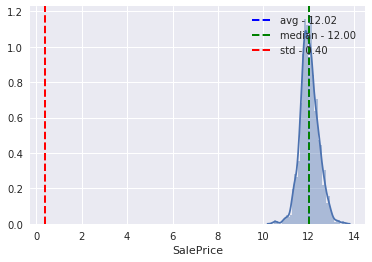

In [56]:
#logarithmical distribution of 'SalePrice'
dists(np.log(train['SalePrice']), True)

The logarithmical graph shows general normal distribution of data with approximately normal mean equals to the median, standard deviation of 1~ and symmetrical distribution around the mean.


#### Numerical features
Now we want to check the numerical features and their correlation to 'SalePrice'. We expect to find the most relevant variables (feature selection) and outliers in this section. Lets start!!

In [57]:
#describe() shows only numerical features
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1194.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1414.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,70.027638,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,3.577086,...,46.422467,21.952447,3.430737,15.154376,2.776017,0.013094,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,24.299302,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,0.680898,...,66.060150,61.108223,29.406940,55.917522,40.301212,0.204689,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,59.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,69.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,4.000000,...,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,80.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,4.000000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,4.000000,15500.000000,12.000000,2010.000000,755000.000000


In [23]:
#extract numerical features only
numeric = train._get_numeric_data()
numeric = numeric.drop(['SalePrice', 'Id'], 1)

We'll do a correlations between all the numerical features vs. 'SalePrice'. This should be interesting!

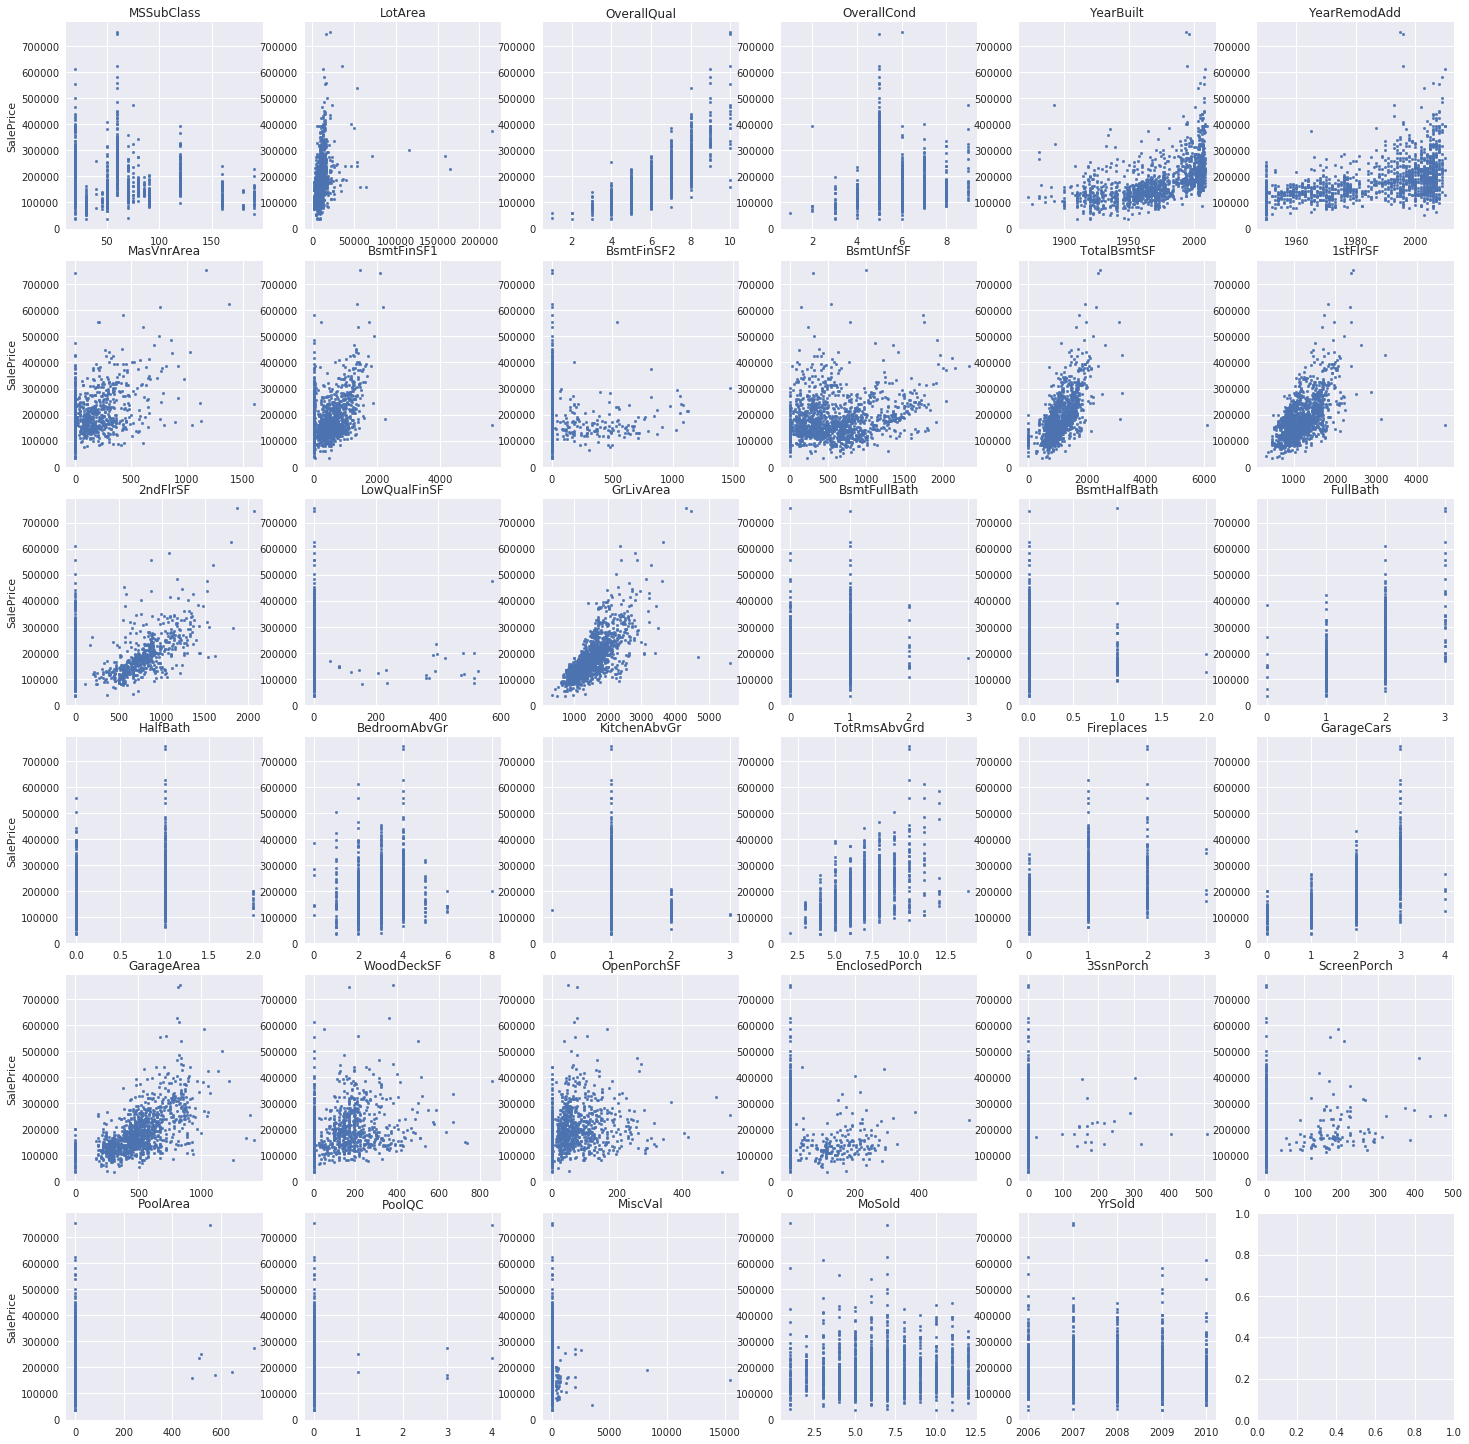

In [24]:
fig,ax = plt.subplots(ncols=6, nrows=6, figsize=(20,20))
fig.tight_layout()

for i in range(0, 35):
    plt.subplot(6, 6, i+1)
    plt.scatter(numeric[numeric.columns[i]], train['SalePrice'], s=7)
    plt.title(numeric.columns[i])
    if i%6==0:
        plt.ylabel('SalePrice')

We notice some continuous numerical features and some discrete ones, and if we look closely we see that all of them make sense. For example 'MoSold', 'YrSold', 'Fireplaces', GarageCars', 'OverallQual' and more that obviously have a discrete number as a describtion.

In the mean while we will focus on the continuous features only.
In an overall look we see that the numerical features all have a positive correlation with 'SalePrice'.

Some of the figures we may find interesting are the ones between 'TotalBsmtSF', '1stFlrSf' and 'GrLiveArea' correlated with 'SalePrice'. If we think about it these three variables express partially the same thing! ('First Floor square feet', 'Above ground living area square feet' and 'Total square feet of basement area' (there wont be a basement bigger than the house it self)), so we'll deal with one and see if it will actually affect the two others!

In 'GrLiveArea' vs. 'SalePrice' graph, notice the linear positive relationship and the few outliers on the sides.

In [25]:
#a function that return the correlation between 'TotalBsmtSF', '1stFlrSf' and 'GrLiveArea' vs. 'SalePrice'
def graphs():
    fig,ax = plt.subplots(ncols=3, nrows=1, figsize=(30,10))
    fig.tight_layout()
    names = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF']
    a=25

    for i in range(0, 3):
        x = train[names[i]]
        y = train['SalePrice']
        plt.subplot(1, 3, i+1)
        
        fit = np.polyfit(x,y,1)
        fit_fn = np.poly1d(fit) #a function which takes in x and returns an estimate for y
        pearCo = np.corrcoef(x,y)[1,0]
        
        plt.scatter(x, y, s=50)
        plt.xlabel(names[i], fontsize=a)
        plt.plot(x, y, 'yo', x, fit_fn(x), label="r = %.4f"%(pearCo))
        plt.xticks(fontsize=a-5)
        plt.yticks(fontsize=a-5)
        plt.legend(loc=2, fontsize=a)
        if i%3==0:
            plt.ylabel('SalePrice', fontsize=a)
            
#another option sns.regplot(x, y, data = train)

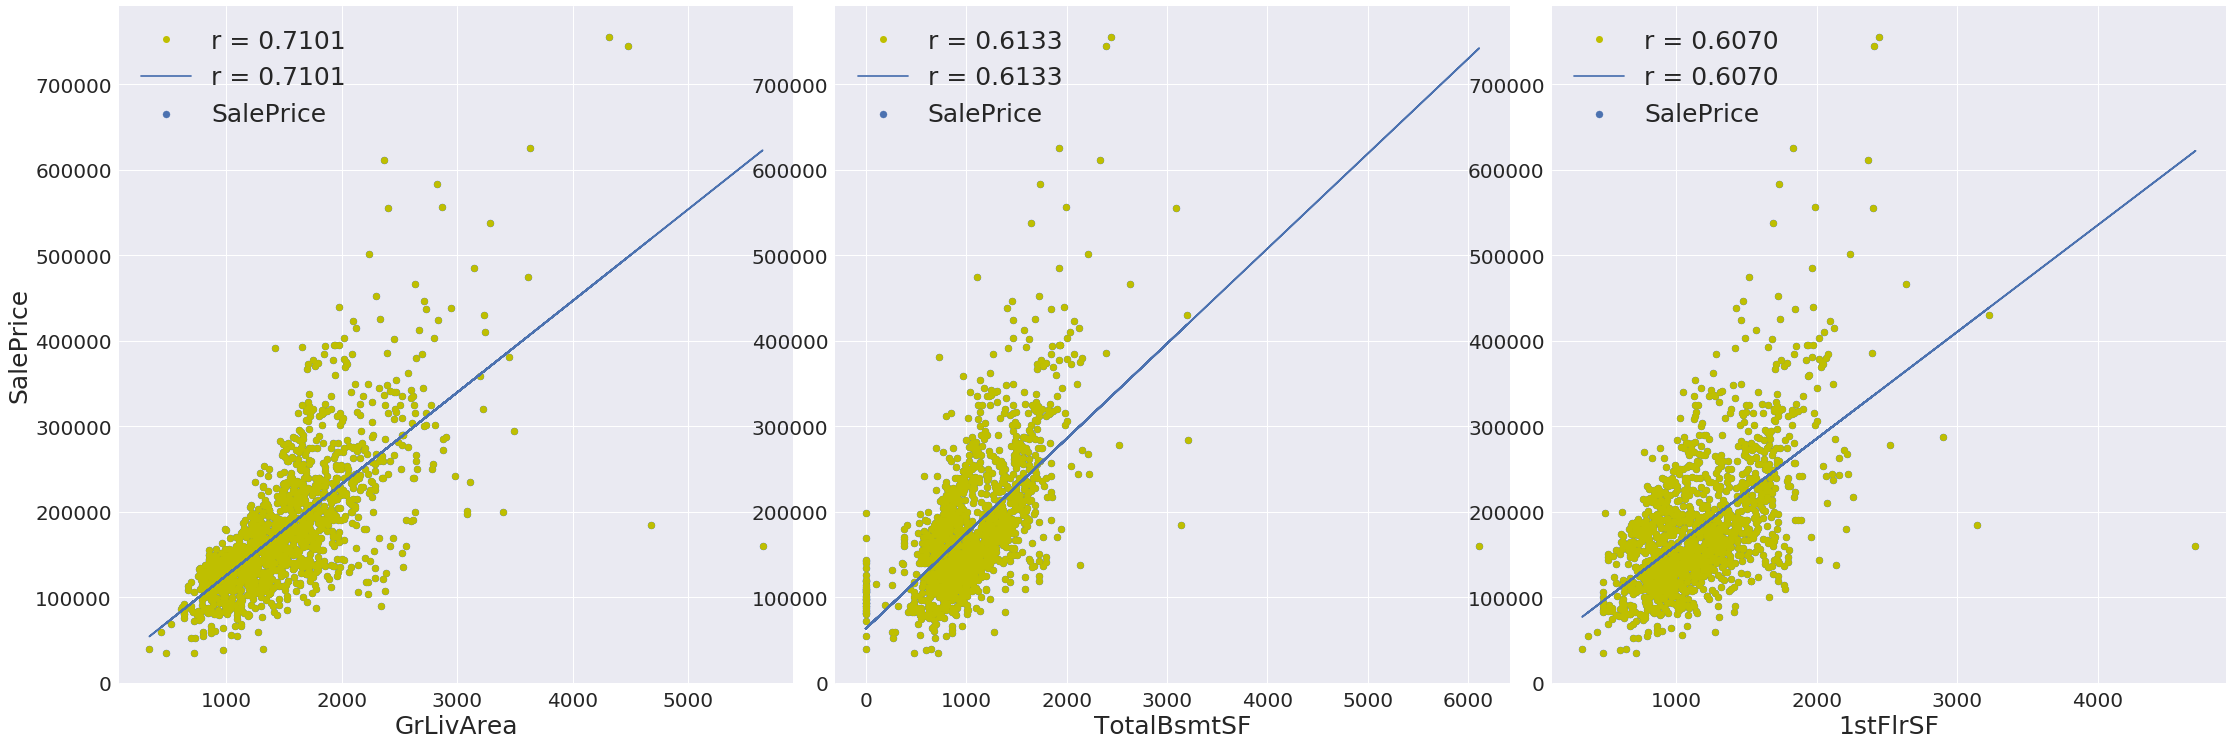

In [26]:
#zoom in to the three graphs
graphs()

There seems to be two extreme outliers on the bottom right, really large houses that sold for really cheap. More generally, the author of the dataset recommends removing 'any houses with more than 4000 square feet' from the dataset, thus deleting all the outliers presented in these graphs [5]. We'll keep in mind the Pearson correlation coefficient we got here so we compare it after removing the outliers.

In [58]:
#removing all houses with more than 4000 square feet
train = train[train.GrLivArea < 4000]

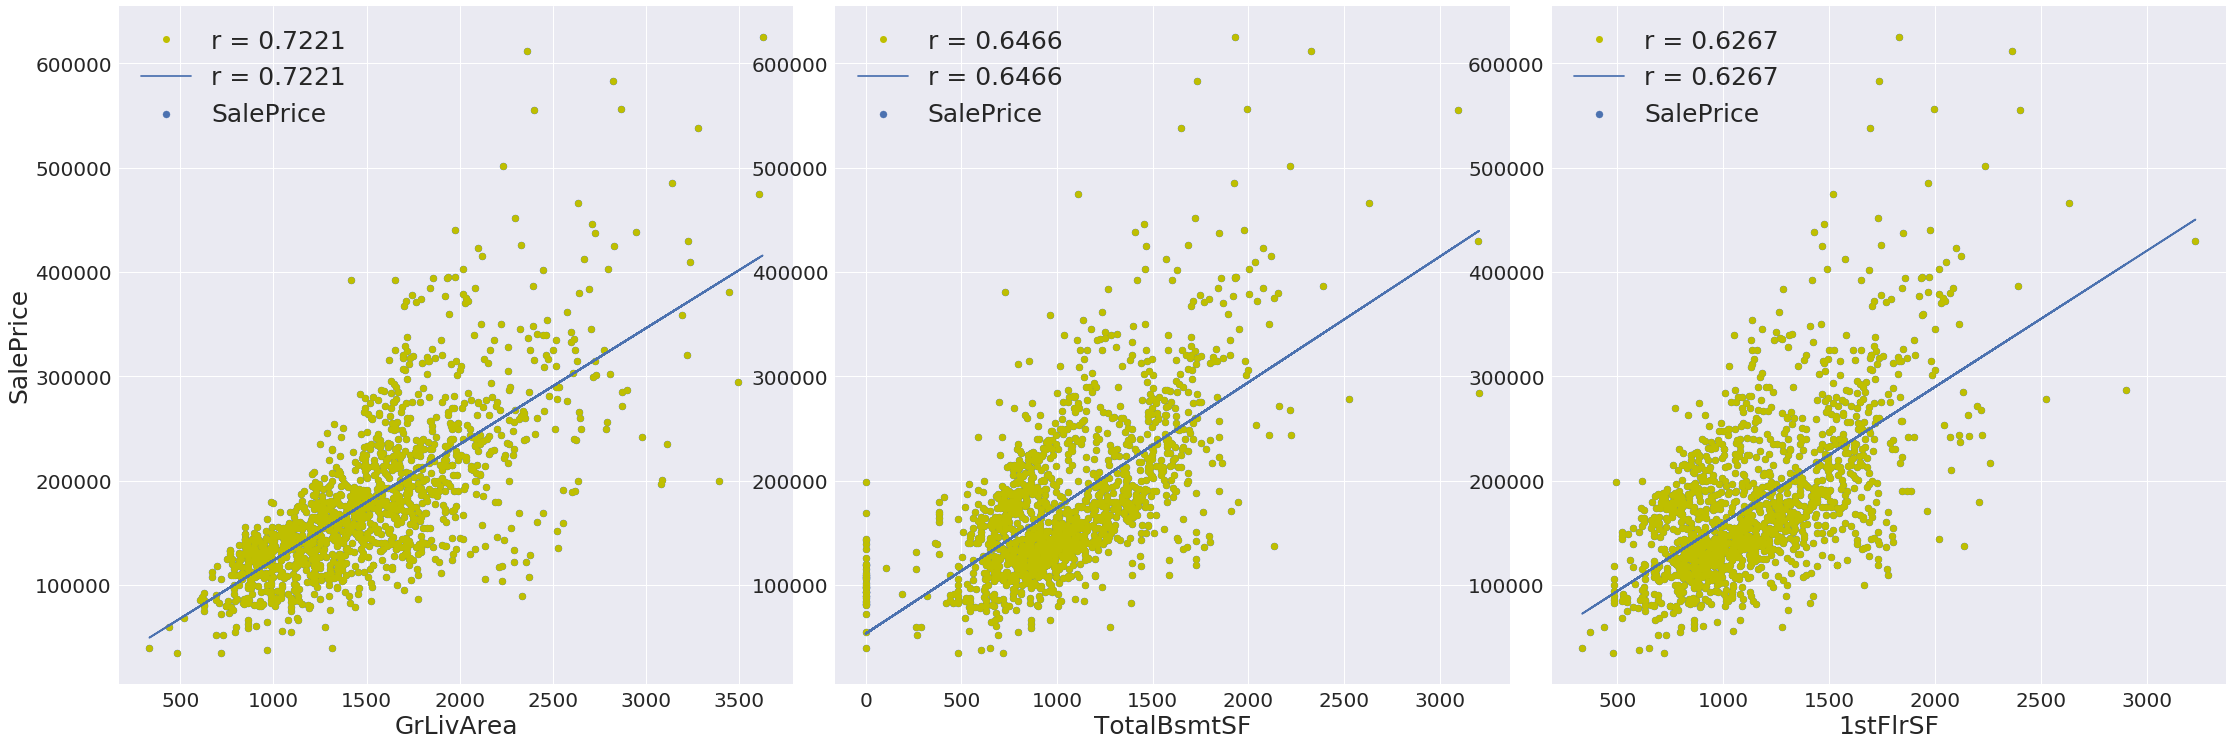

In [28]:
#the three graphs after removing houses bigger than 4000 square feet
graphs()

In [29]:
#remove from legened the other labels

The graphs look a bit better and tightened, although we found new potential outliers but we will stop here with dealing with the outliers. 
Secondly, we can see that the Pearson correlation coefficient got bigger after we removed the outliers (closer to 1 - stronger positive linear correlation).

What's next? 

Let's look at some of the discrete variables and see if we can get something out of them!

Let's zoom in on 'YearBuilt' and 'SalePrice'

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

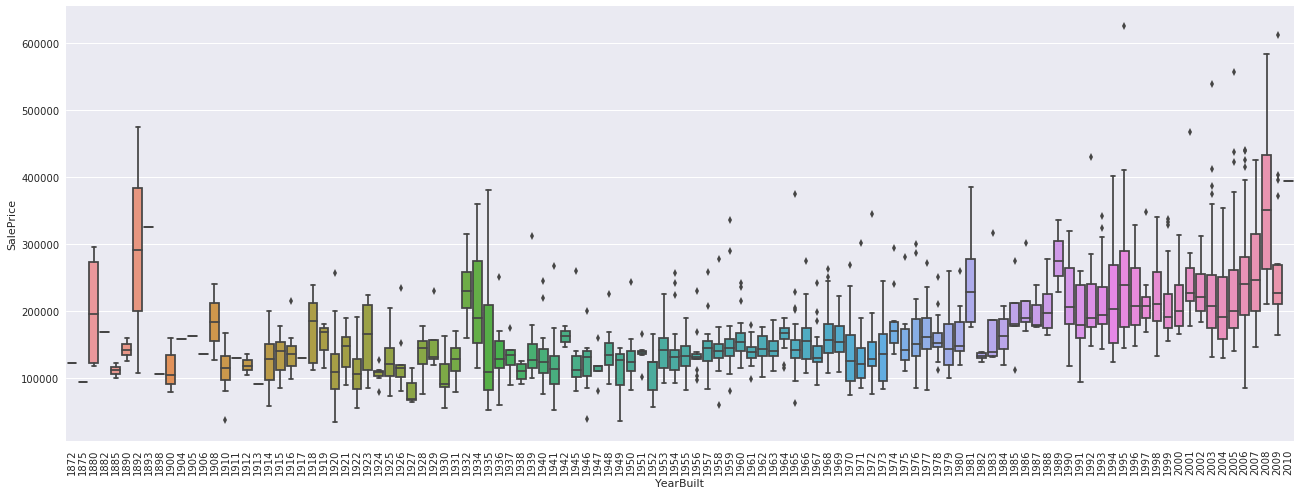

In [60]:
#boxplot 'YearBuilt' vs. 'SalePrice'
f, ax = plt.subplots(figsize=(22, 8))
fig = sns.boxplot('YearBuilt', 'SalePrice', data=train)
plt.xticks(rotation=90)

There isn't a strong uniformal tendecy, but we can see that spending money on new houses is more likely than old ones. 
*Assuming of course that the currency didn't change over years and we can compare between the prices.

Let's zoom in now on 'OverallQual'

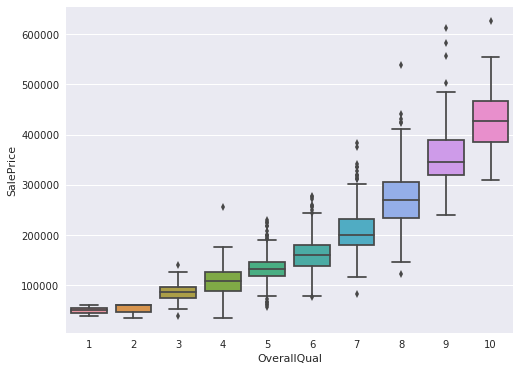

In [32]:
#boxplot 'OverallQual' vs. 'SalePrice'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot('OverallQual', 'SalePrice', data=train)

OK! Looks good, we see a strong positive correlation, the higher the quality the higher the price. Makes sense! 

Next..

A different way to get an overview of the variables and thier relationship - correlation matrix (heatmap) 

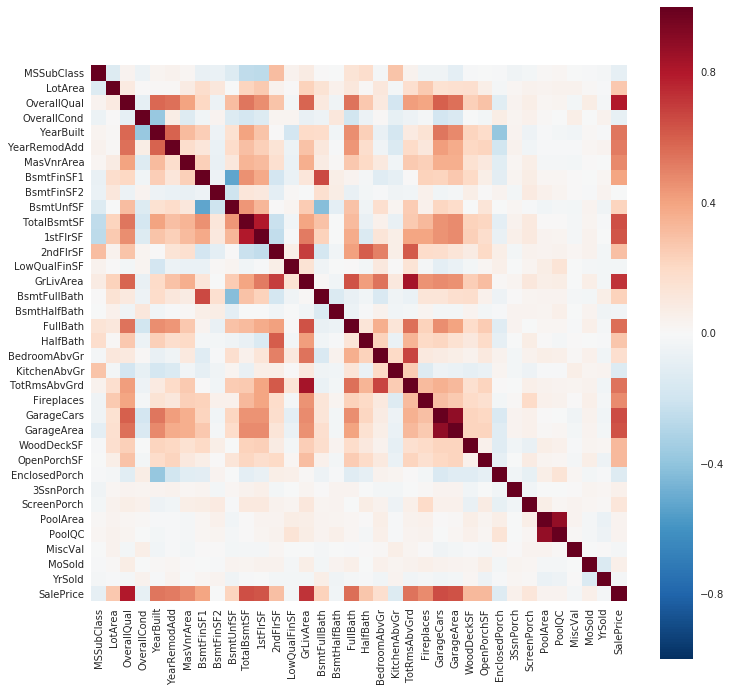

In [33]:
corr = train.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

Alright, there are a few noticable red squares that got our attention immediately! '1stFlrSF' vs. 'TotalBsmtSF', 'TotRmsAbvGrd' vs. 'GrLivArea', 'GragaArea' vs. 'GarageCars', 'PoolQC' vs. 'PoolArea', 'OverallQual' vs. 'SalePrice', 'GrLivArea' vs. 'SalePrice' and few more that show a good relationship with 'SalePrice'.

Again, we see here some strong correlated variables that express partially the same thing! There is no garage area that fits 2 cars correlated with 5 garage cars, the same goes total rooms above ground and ground living area and such.

Let's do a close up on the top 7 most correlated variables with 'SalePrice'!

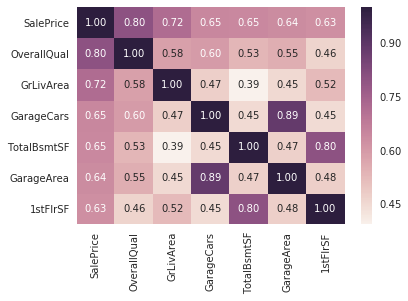

In [34]:
#a correlation matrix to quantify linear relationship between the top 7 features
top = corr.nlargest(7, 'SalePrice')['SalePrice'].index
corcoef = np.corrcoef(train[top].values.T)
sns.heatmap(corcoef, annot=True, fmt='.2f', yticklabels=top.values, xticklabels=top.values)

We choose the top 7 correlated features with 'SalePrice' because in the end we want to build intuitive and friendly model that use the least information for best approximations.

#### Categorical features

It's time for categorical features. We will start with a few categorical features and their relationship with 'SalePrice', and then we'll continue with generating dummy variables.

###### Quick overview of some categorical variables
We'll start with the 'Neighborhood' vs. 'SalePrice', we predict that some neighborhoods are more expensive than others from all different reasons, such as:

* Location (urban, suburban, rural, etc.)

* Density (i.e. dwelling units per acre)

* Social, and ethnic diversity

* Safety

* Transportation

and much more ...

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

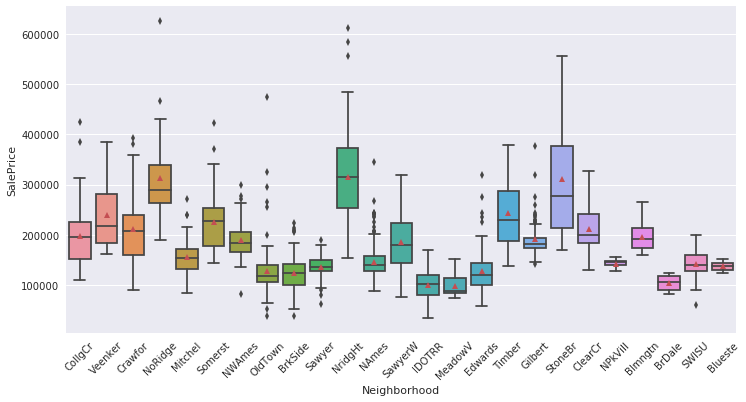

In [42]:
plt.figure(figsize = (12, 6))
sns.boxplot(train['Neighborhood'], train['SalePrice'],  data = train, showmeans=True)
plt.xticks(rotation=45)

We see that there are a few neighborhoods that sell more houses for higher prices like NridgHt and StoneBr, we also can look at NoRidge and Timber in specific to see any special features regarding those areas.

From a source [6] (and the help of google maps) we extracted the distence (in miles) of all the neighborhoods to the old city! We choose the old city as a reference for us because it may include all the attractions, business building, transportation in and out (or at least to the outer circle of the old city), and all other features that may attrac the people to live there.

Another possiblity, is that the young live in the old city with cheaper houses that students and workers at their age can afford and the old who prefer the silence and the rural location are further away from the old city with higher prices that a citizen with a job for years can afford. But then again if it's further away with a driving time to any essential need might just be cheaper.

So first thing first, we measured the distence to the old city [6] and converted the data from categorical to numerical! Let's look at the count of houses in every nieghborhood and on the cound of houses according to their distance from the old city!

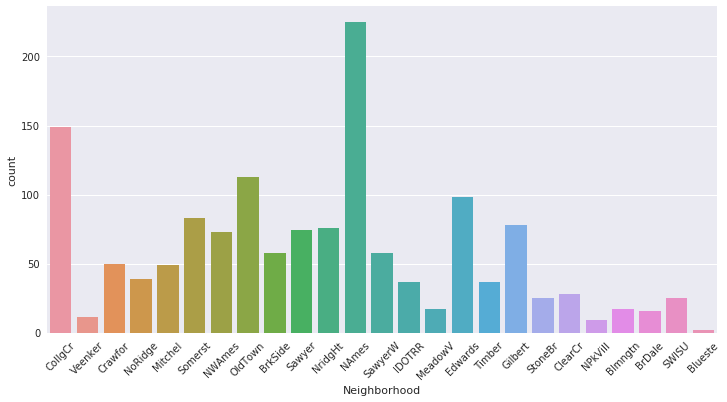

In [41]:
#First graph
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
xt = plt.xticks(rotation=45)

In [62]:
#convert to numerical
mapping = {'CollgCr':2.5, 'Veenker':3.6, 'Crawfor':3.0, 'NoRidge':2.9, 'Mitchel':3.6, 'Somerst':3.6, 'NWAmes':1.4, 'OldTown':0.0, 'BrkSide':2.1, 'Sawyer':2.9, 'NridgHt':3.3, 'NAmes':2.7, 'SawyerW':1.6, 'IDOTRR':3.2, 'MeadowV':4.1, 'Edwards':3.2, 'Timber':6.7, 'Gilbert':0.5, 'StoneBr':0.5, 'ClearCr':3.6, 'NPkVill':1.6, 'Blmngtn':1.0, 'BrDale':3.1, 'SWISU':2.8, 'Blueste':3.1}
train = train.replace({'Neighborhood': mapping})

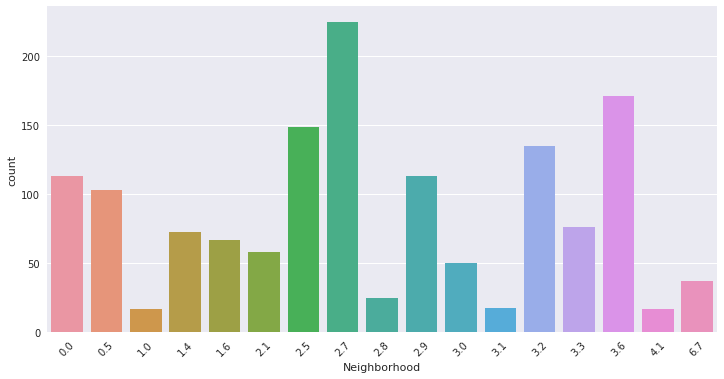

In [65]:
#Second graph
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
xt = plt.xticks(rotation=45)

From the first graph we can see that in CollgCr, NAmes and OldTown are the most nieghborhood with houses to sell! From the second graph we can see that the most wanted houses are far from the old city at 2.7, 3.6, 2.5, 3.2, 2.9 and 0 miles.

'CollgCr':2.5 miles but it's the closest to the college of Ames!
'NAmes':2.7 miles in the north which is closest to the only high school in Ames. [7]

The second graph might validate our prediction for city housing and prices! We can see that the most number of houses are the ones who are closest to initial needs(collage/ high school/ etc.), old city and it's all attractions, calmness and silence in a big city! And not far away that it's hard to get essential needs in a short period of time!


Now lets see if the sale type makes any difference!

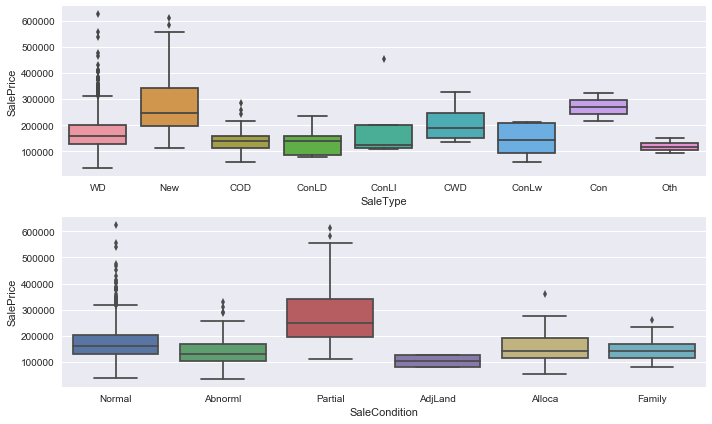

In [43]:
#'SaleType' and 'SaleCondition' vs. 'SalePrice'
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(train['SaleType'], train['SalePrice'], data = train, ax = ax[0])
sns.boxplot(train['SaleCondition'], train['SalePrice'], data = train, ax = ax[1])
plt.tight_layout()

Maybe the Sale type makes a difference if it's a young student or an elderly couple with pension! And from the graphs we can see that the most buyers prefer to buy new houses that just constructed ('SaleType' New) and to pay for houses that aren't complete when last assessed ('SaleCondition' Partial).

Let's look from a different point of view! Maybe the seasons have an indirect effect on the sales. We all know before the educational year there is alot of new student dwellers. In summer, school and work vacations makes it the best time for moving families, and don't forget the weather that makes it just easier to go for a house hunt!

Up coming next - Sales seasonality!

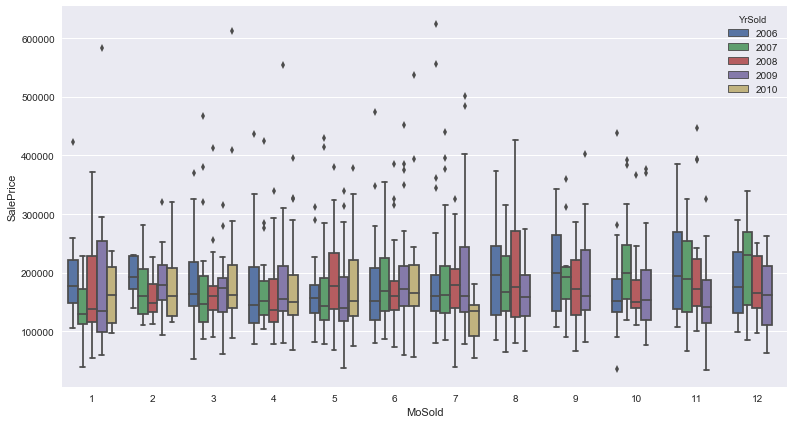

In [45]:
#Sales Seasonality - 'MoSold' and 'YrSold' vs. 'SalePrice'
plt.figure(figsize = (13, 7))
sns.boxplot(train['MoSold'], train['SalePrice'], hue=train['YrSold'])

* Notice that the last entries for the year 2010 are on July.

We can see that the prices are a bit higher in the months of August and September.
Let's look at each year individualy! (without the year 2010 because provided only half of the months data)

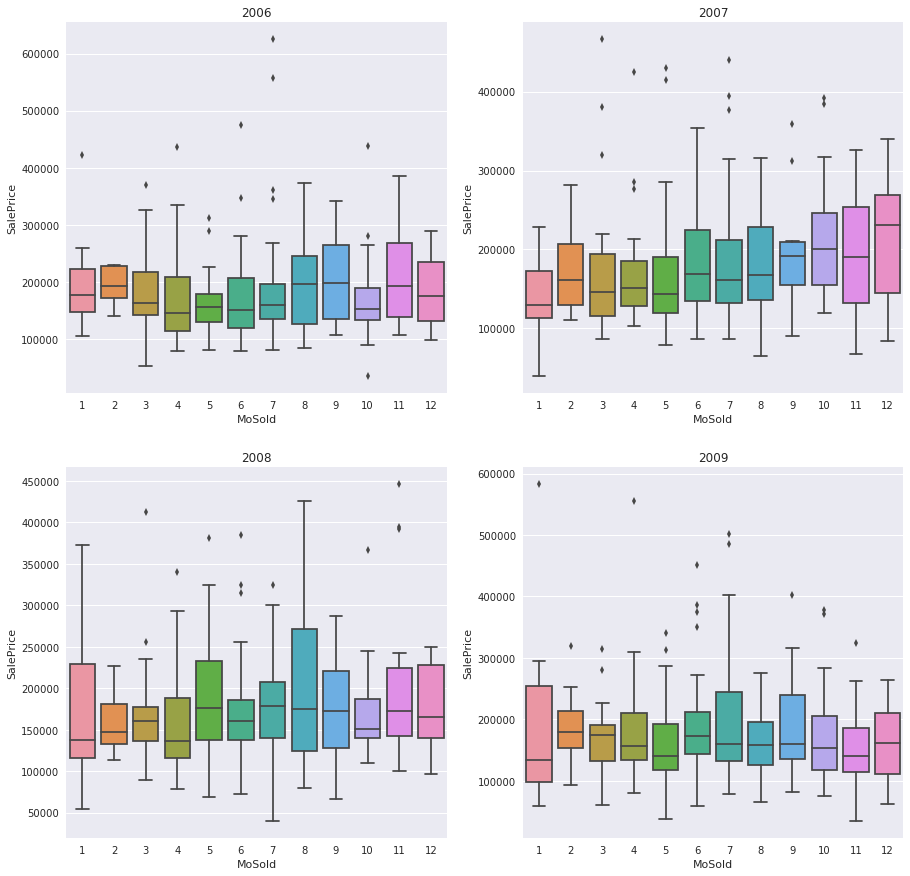

In [91]:
years = [2006, 2007, 2008, 2009]

fig,ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15))

for i in range(0, 4):
    plt.subplot(2, 2, i+1)
    sns.boxplot(train['MoSold'][train['YrSold']==years[i]], train['SalePrice'][train['YrSold']==years[i]])
    plt.title(years[i])


We can see that in most of the years the houses were sold in the end of the year in highlight on the summer vacation months.

Weather..

Ames, Iowa is a cold place in winter with an average of 0 and degrees up to -10 in the really cold days! So looking for a house with good heating (fireplace or electrical) is quite important.

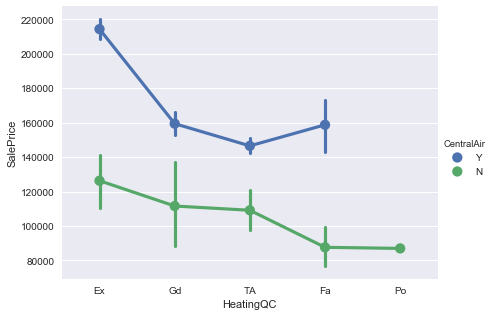

In [46]:
#'HeatingQC' vs. 'SalePrice'
sns.factorplot('HeatingQC', 'SalePrice', hue = 'CentralAir', data = train, size = 4.5, aspect = 1.4)

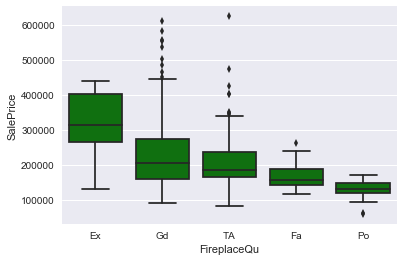

In [47]:
#'FireplaceQu' vs. 'SalePrice'
sns.boxplot('FireplaceQu', 'SalePrice', data = train, color = 'g', order=['Ex', 'Gd', 'TA', 'Fa', 'Po'])

We can see from the two last graphs that the heating feature is indeed important in our analysis. There is a clear difference between prices of houses without heating comparing to houses with heating either by an air conditioning or a fireplace. Even with poorer quality of heating is more expensive than no heating at all which may mean that it's more wanted by the buyers of the houses.

###### Dummy variables

Dummy variable is one that takes the value 0 or 1 to indicate the absence or presence of categorical effect.

In [92]:
# OZ add what they are used for

In [49]:
#generating dummy variables
categ1 = train.select_dtypes(include = ["object"])     #sperate to non numeric variables
numer2 = train.select_dtypes(exclude = ["object"])     #sperate only to numeric variables
categ1 = pd.get_dummies(categ1)                        #generating dummies for non numeric variables
new_dtrain = pd.concat([numer2, categ1],axis=1)        #concat the new_train and the dummies to one new dataframe

The dummy variables will be in use in the next section, Analysis. Let's proceed..

# Analysis
On this section we will build the models.
The first model will be with only numerical features.
The second model includes also dummies.
### let's start with choosing the releveant features (the top7 that corr with "SalePric")

In [52]:
dataset = train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
                 'TotalBsmtSF', 'GarageArea', '1stFlrSF']]

dataset.columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','TotalBsmtSF', 'GarageArea', 'FirstFlrSF']


In [117]:
#linear regression
result = sm.ols(formula="SalePrice ~ OverallQual + GrLivArea + GarageCars + TotalBsmtSF + GarageArea + FirstFlrSF ", data=dataset).fit()

In [57]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     996.6
Date:                Sun, 03 Sep 2017   Prob (F-statistic):               0.00
Time:                        14:53:59   Log-Likelihood:                -17139.
No. Observations:                1447   AIC:                         3.429e+04
Df Residuals:                    1440   BIC:                         3.433e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept   -1.056e+05   4331.961    -24.375      

This model shows sig of P.value < 0.001% this means that
our model reflect the data and the adjuster R squared is: 0.805.
When adjuster R squared >0.7 the model it means that it explains pretty good the variance.
Not surprisingly we can see that all beta's, sth slopes, are positve and that fits to our hypothesis

Now we go back to our first froblem - multiple features, we want to use the least we can, but we have so many dummies that we have to choose the best of those.
As data reduction we used "random forest" algorithm. this way we can rank the most and least important "dummies" features.

In [60]:
#Random forst for data reduction

In [61]:
Y = train['SalePrice']
X = categ1    #we destinct the dummies earlier to categ1.
rf = RandomForestRegressor()
rf.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [76]:
rf.feature_importances_

array([  9.96074178e-04,   2.00608057e-03,   1.41118303e-04,
         3.45626739e-03,   5.89070499e-03,   3.36213248e-05,
         2.05291597e-05,   5.48455492e-03,   3.65879400e-03,
         5.99754379e-04,   7.96773201e-03,   6.06845024e-04,
         8.11675069e-04,   3.05937981e-04,   7.96355988e-03,
         1.39610408e-05,   2.63727893e-05,   3.26692491e-03,
         3.32865143e-03,   1.61653124e-03,   7.08829873e-05,
         5.44465724e-03,   5.63519354e-03,   1.53983060e-03,
         1.25999952e-03,   4.41048346e-04,   6.72375371e-08,
         1.92828854e-04,   6.42335536e-04,   2.07611406e-03,
         3.19159102e-03,   4.24897912e-03,   2.26245086e-03,
         1.39089098e-03,   3.70803165e-04,   7.35135650e-04,
         1.02975121e-03,   1.05059029e-03,   9.74802385e-05,
         3.50889277e-03,   2.67905806e-02,   1.34174744e-02,
         1.44635012e-03,   5.73181509e-04,   3.15432236e-04,
         2.17202984e-03,   5.22695115e-03,   7.19733153e-03,
         2.91115268e-03,

In [75]:
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_colnames), reverse=True))

[(0.36699999999999999, 'ExterQual_TA'), (0.12330000000000001, 'KitchenQual_Ex'), (0.081299999999999997, 'FireplaceQu_NA'), (0.026800000000000001, 'Neighborhood_NoRidge'), (0.021299999999999999, 'Foundation_PConc'), (0.017899999999999999, 'BldgType_1Fam'), (0.016, 'KitchenQual_Gd'), (0.0134, 'Neighborhood_NridgHt'), (0.0132, 'HouseStyle_2Story'), (0.011599999999999999, 'ExterQual_Gd'), (0.010699999999999999, 'RoofStyle_Gable'), (0.0091000000000000004, 'MasVnrType_Stone'), (0.0080000000000000002, 'LotShape_Reg'), (0.0080000000000000002, 'LandContour_Lvl'), (0.0077000000000000002, 'MasVnrType_None'), (0.0071999999999999998, 'Neighborhood_StoneBr'), (0.0064000000000000003, 'RoofStyle_Hip'), (0.0064000000000000003, 'MasVnrType_BrkFace'), (0.0060000000000000001, 'SaleType_WD'), (0.0060000000000000001, 'HouseStyle_1Story'), (0.0060000000000000001, 'FireplaceQu_Gd'), (0.0058999999999999999, 'MSZoning_RM'), (0.0055999999999999999, 'LandSlope_Gtl'), (0.0054999999999999997, 'LotShape_IR1'), (0.00

C:\Users\Oz\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


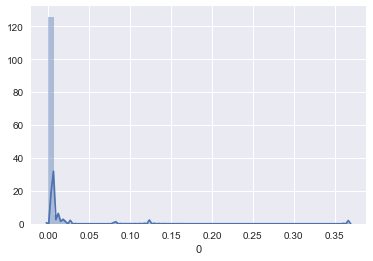

In [97]:
Sorted_Features=(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_colnames), reverse=True))
Sorted_Features=pd.DataFrame(Sorted_Features)
sns.distplot(Sorted_Features.iloc[:,0])

We can see that most features doesn't help us to predict the housre price.

In [99]:
Save_Relevant_Fratures = Sorted_Features.iloc[0:10,1] #choose the 10 most important features.

In [127]:
Save_Relevant_Fratures #print the most important

0            ExterQual_TA
1          KitchenQual_Ex
2          FireplaceQu_NA
3    Neighborhood_NoRidge
4        Foundation_PConc
5           BldgType_1Fam
6          KitchenQual_Gd
7    Neighborhood_NridgHt
8       HouseStyle_2Story
9            ExterQual_Gd
Name: 1, dtype: object

In [ ]:
### Haia, do u thins we should write any remarks?

In [129]:
categ1[Save_Relevant_Fratures].describe()

,ExterQual_TA,KitchenQual_Ex,FireplaceQu_NA,Neighborhood_NoRidge,Foundation_PConc,BldgType_1Fam,KitchenQual_Gd,Neighborhood_NridgHt,HouseStyle_2Story,ExterQual_Gd
count,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000,1447.000000
mean,0.625432,0.065653,0.473393,0.026952,0.438148,0.834831,0.400138,0.052522,0.302695,0.331721
std,0.484179,0.247760,0.499464,0.162000,0.496331,0.371462,0.490096,0.223155,0.459583,0.470994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
#setting the dataset before the linear regression
dataset_Dummies = pd.concat([dataset,categ1[Save_Relevant_Fratures]],axis=1)

In [141]:
#runnig a regression
result = sm.ols(formula="SalePrice ~ OverallQual + GrLivArea + GarageCars + TotalBsmtSF + GarageArea + FirstFlrSF+ ExterQual_TA + KitchenQual_Ex + FireplaceQu_NA + Neighborhood_NoRidge + Foundation_PConc + BldgType_1Fam + KitchenQual_Gd + Neighborhood_NridgHt + HouseStyle_2Story + ExterQual_Gd", data=dataset_Dummies).fit()

print(result.summary())
#ExterQual_TA + KitchenQual_Ex + FireplaceQu_NA + Neighborhood_NoRidge + Foundation_PConc + BldgType_1Fam + KitchenQual_Gd + Neighborhood_NridgHt + HouseStyle_2Story + ExterQual_Gd

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     506.5
Date:                Mon, 04 Sep 2017   Prob (F-statistic):               0.00
Time:                        14:27:25   Log-Likelihood:                -16952.
No. Observations:                1447   AIC:                         3.394e+04
Df Residuals:                    1430   BIC:                         3.403e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept            -2.783e+04 

Ok! So we can see clearly that the model is more accurate than before, the index for that is the adjusted R squared the climbs to 0.85.
we belive that this model can explain easily house prices and anybody can use it.
now we should cheak our Kaggle ranking.
#### Haia, I Think we should write we some slopes are neagative and positive, what do u think?

### Reference

[1] https://en.wikipedia.org/wiki/Ames,_Iowa

[2] https://www.kaggle.com/c/house-prices-advanced-regression-techniques 

[3] https://en.wikipedia.org/wiki/Multicollinearity

[4] http://www.investopedia.com/terms/m/multicollinearity.asp

[5] https://ww2.amstat.org/publications/jse/v19n3/decock.pdf

[6] http://www.areavibes.com/ames-ia/livability/

[7] http://www.city-data.com/city/Ames-Iowa.html